In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import math
from sklearn.metrics import r2_score
import talib as ta
import seaborn as sns

In [2]:
data_processed = pd.read_csv('DataSet/indexProcessed.csv/indexProcessed.csv')
data = pd.read_csv('DataSet/indexData.csv/indexData.csv') 

In [3]:
#NASDAQ DATA 
data_processed_nasdaq = data_processed[data_processed['Index'] == 'IXIC']   
data_processed_nasdaq.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
22439,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.000000
22440,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.0,100.839996
22441,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.0,100.760002
22442,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.0,100.690002
22443,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.0,101.449997


In [4]:
data_index_nasdaq = data[data['Index'] == 'IXIC']
data_index_nasdaq.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.0
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.0
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.0
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.0


In [5]:
data_nasdaq = pd.concat([data_processed_nasdaq,data_index_nasdaq]).drop_duplicates() #nasdaq data full
data_nasdaq = data_nasdaq.dropna()
data_nasdaq.set_index('Date', inplace = True)
data_nasdaq.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1971-02-05,IXIC,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.000000
1971-02-08,IXIC,100.839996,100.839996,100.839996,100.839996,100.839996,0.0,100.839996
1971-02-09,IXIC,100.760002,100.760002,100.760002,100.760002,100.760002,0.0,100.760002
1971-02-10,IXIC,100.690002,100.690002,100.690002,100.690002,100.690002,0.0,100.690002
1971-02-11,IXIC,101.449997,101.449997,101.449997,101.449997,101.449997,0.0,101.449997


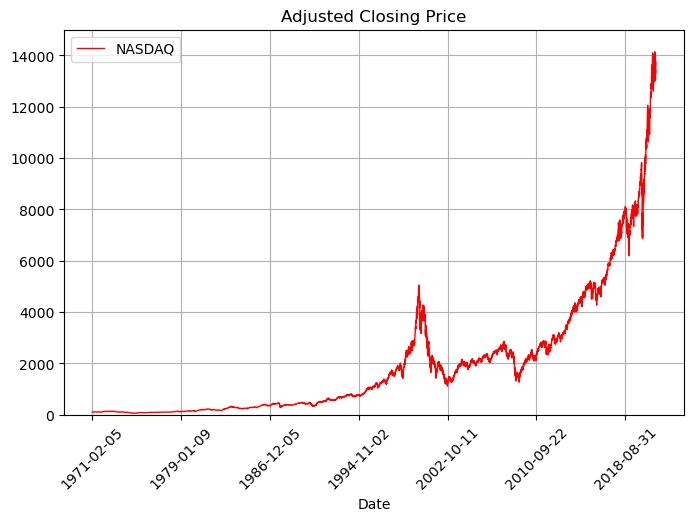

In [6]:
data_nasdaq['Adj Close'].plot(label='NASDAQ', figsize=(8, 5), xlabel = 'Date',ylim = (0,15000),title='Adjusted Closing Price', color='red', linewidth=1.0, grid=True)
plt.xticks(rotation=45)
plt.legend()

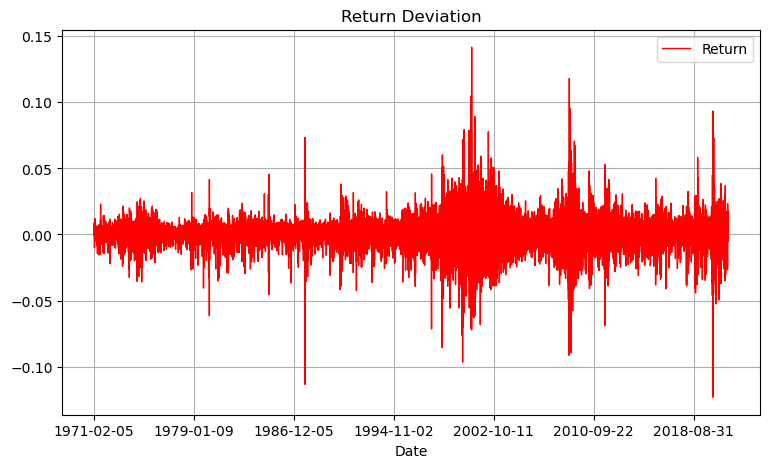

In [7]:
# Moving Average to remove the noise in the graph and smoothen it
close_col = data_nasdaq['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Average with window size 100
rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(9, 5), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [8]:
#New York Stock Exchange DATA
data_processed_nya = data_processed[data_processed['Index'] == 'NYA']    
data_processed_nya.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


In [9]:
data_index_nya = data[data['Index'] == 'NYA']    
data_index_nya.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [10]:
data_nya = pd.concat([data_processed_nya,data_index_nya]).drop_duplicates() #nasdaq data full
data_nya = data_nya.dropna()
data_nya.set_index('Date', inplace = True)
data_nya.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1965-12-31,NYA,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,528.690002
1966-01-03,NYA,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,527.210022
1966-01-04,NYA,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,527.840027
1966-01-05,NYA,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,531.119995
1966-01-06,NYA,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,532.070007


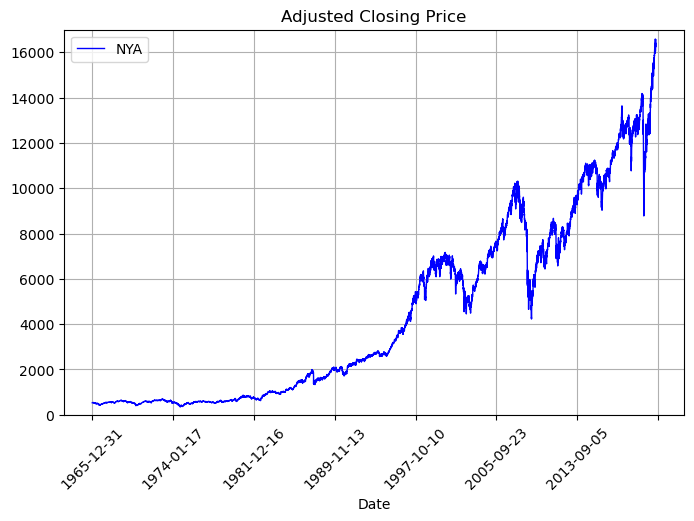

In [11]:
data_nya['Adj Close'].plot(label='NYA',figsize=(8, 5),ylim = (0,17000),title='Adjusted Closing Price', color='blue', linewidth=1.0, grid=True)
plt.xticks(rotation=45)
plt.legend()

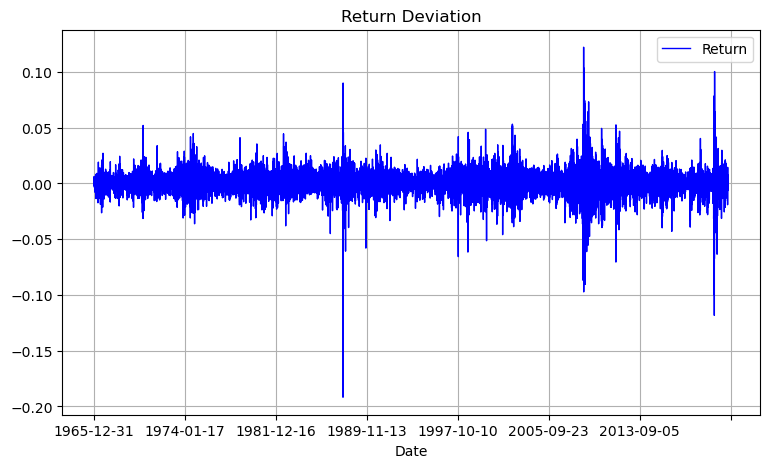

In [12]:
# Moving Average to remove the noise in the graph and smoothen it
close_col = data_nya['Adj Close']
mvag = close_col.rolling(window=100).mean()     # Average with window size 100
rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(9, 5), title='Return Deviation', color='blue', linewidth=1.0, grid=True)
plt.legend()

# DATA SPLITTING 

In [43]:
#data values to consider as input
features_to_fit = ['MA_50','RSI', 'SMA_Fast', 'SMA_Slow', 'BOL_Upp', 'BOL_Low']
# training and testing function
def make_train_test_split(X, y, train_size):
    split_seed = int(X.shape[0]*train_size)
    # Split data into test and train
    X_test = X[0:split_seed]
    X_train = X[split_seed:]
    split_seed = int(y.shape[0]*train_size)
    y_test = y[0:split_seed]
    y_train = y[split_seed:]
    return X_train,X_test,y_train,y_test

In [44]:
#PARTING THE DATA 
df_nasdaq = data_nasdaq[data_nasdaq.index > '1985-01-01']
df_nya = data_nya[data_nya.index > '1985-01-01']

In [45]:
#WHOLE DATA SET INPUT CALCULATION OF NASDAQ
data_nasdaq['MA_50'] = ta.MA(data_nasdaq['Close'].values, timeperiod=50, matype=0)
data_nasdaq['RSI'] = ta.RSI(data_nasdaq['Close'].values, 14)
data_nasdaq['SMA_Fast'] = ta.SMA(data_nasdaq['Close'].values, 5)
data_nasdaq['SMA_Slow'] = ta.SMA(data_nasdaq['Close'].values, 20)
data_nasdaq['BOL_Upp'], data_nasdaq['BOL_Mid'], data_nasdaq['BOL_Low'] = ta.BBANDS(data_nasdaq['Close'].values,timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
data_nasdaq['NextClose'] = data_nasdaq['Close'].shift(-1) #FOR OUTPUT VALUE

In [46]:
data_nasdaq = data_nasdaq.dropna()
data_nasdaq.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,MA_50,RSI,SMA_Fast,SMA_Slow,BOL_Upp,BOL_Mid,BOL_Low,NextClose
Date,,,,,,,,,,,,,,,,
1971-06-28,IXIC,106.449997,106.449997,106.449997,106.449997,106.449997,0.0,106.449997,109.4944,35.110862,106.171999,108.6735,112.088722,108.6735,105.258279,107.220001
1971-06-29,IXIC,107.220001,107.220001,107.220001,107.220001,107.220001,0.0,107.220001,109.4356,42.225963,106.517999,108.5910,112.062502,108.5910,105.119499,107.800003
1971-06-30,IXIC,107.800003,107.800003,107.800003,107.800003,107.800003,0.0,107.800003,109.4010,46.945033,106.880000,108.5030,111.960990,108.5030,105.045011,108.470001
1971-07-01,IXIC,108.470001,108.470001,108.470001,108.470001,108.470001,0.0,108.470001,109.3800,51.838865,107.300000,108.4155,111.782645,108.4155,105.048355,108.769997
1971-07-02,IXIC,108.769997,108.769997,108.769997,108.769997,108.769997,0.0,108.769997,109.3556,53.889776,107.742000,108.3210,111.533401,108.3210,105.108599,109.230003


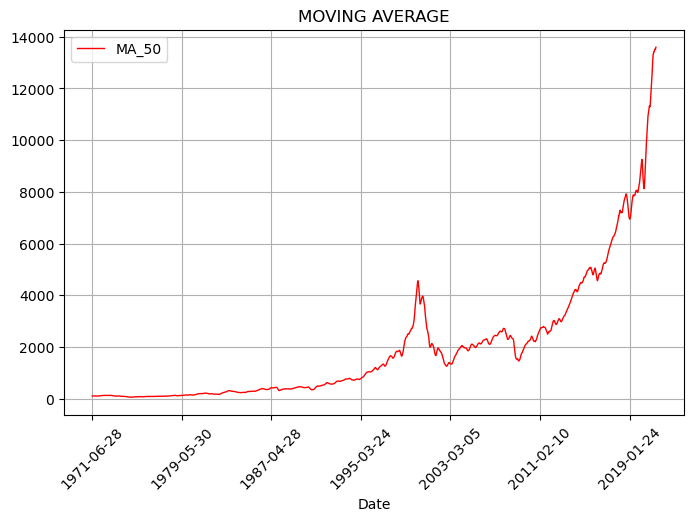

In [96]:
data_nasdaq['MA_50'].plot(label='MA_50',figsize=(8, 5),title='MOVING AVERAGE', color='red', linewidth=1.0, grid=True)
plt.xticks(rotation=45)
plt.legend()

In [47]:
X_nasdaq1 = data_nasdaq[features_to_fit]
y_nasdaq1 = data_nasdaq['NextClose']

In [48]:
X_train_nas1, X_test_nas1, y_train_nas1, y_test_nas1 = make_train_test_split(X_nasdaq1, y_nasdaq1, 0.2)
print(X_train_nas1.shape)
print(y_train_nas1.shape)
print(X_test_nas1.shape)
print(y_test_nas1.shape)

(10072, 6)
(10072,)
(2518, 6)
(2518,)


In [49]:
#PART OF DATA SET INPUT CALCULATION OF NASDAQ
df_nasdaq['MA_50'] = ta.MA(df_nasdaq['Close'].values, timeperiod=50, matype=0)
df_nasdaq['RSI'] = ta.RSI(df_nasdaq['Close'].values, 14)
df_nasdaq['SMA_Fast'] = ta.SMA(df_nasdaq['Close'].values, 5)
df_nasdaq['SMA_Slow'] = ta.SMA(df_nasdaq['Close'].values, 20)
df_nasdaq['BOL_Upp'], df_nasdaq['BOL_Mid'], df_nasdaq['BOL_Low'] = ta.BBANDS(df_nasdaq['Close'].values,timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df_nasdaq['NextClose'] = df_nasdaq['Close'].shift(-1) #FOR OUTPUT VALUE
df_nasdaq = df_nasdaq.dropna()
df_nasdaq.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,MA_50,RSI,SMA_Fast,SMA_Slow,BOL_Upp,BOL_Mid,BOL_Low,NextClose
Date,,,,,,,,,,,,,,,,
1985-03-13,IXIC,281.000000,281.500000,278.000000,278.200012,278.200012,80220000.0,278.200012,274.336001,41.278371,281.280005,285.120003,290.482684,285.120003,279.757322,277.500000
1985-03-14,IXIC,277.000000,278.200012,276.899994,277.500000,277.500000,72640000.0,277.500000,274.968001,39.594238,280.140002,284.580003,290.677739,284.580003,278.482268,278.000000
1985-03-15,IXIC,277.500000,278.299988,277.399994,278.000000,278.000000,68930000.0,278.000000,275.600001,41.432304,279.260004,284.060004,290.528512,284.060004,277.591495,277.100006
1985-03-18,IXIC,278.299988,278.500000,277.100006,277.100006,277.100006,68690000.0,277.100006,276.220001,39.124566,278.440002,283.530003,290.440602,283.530003,276.619404,278.899994
1985-03-19,IXIC,277.200012,279.000000,277.100006,278.899994,278.899994,85720000.0,278.899994,276.880001,45.645337,277.940002,283.130003,290.139455,283.130003,276.120552,278.799988


In [50]:
X_nasdaq2 = df_nasdaq[features_to_fit]
y_nasdaq2 = df_nasdaq['NextClose']

In [51]:
X_train_nas2, X_test_nas2, y_train_nas2, y_test_nas2 = make_train_test_split(X_nasdaq2, y_nasdaq2, 0.2)
print(X_train_nas2.shape)
print(y_train_nas2.shape)
print(X_test_nas2.shape)
print(y_test_nas2.shape)

(7301, 6)
(7301,)
(1825, 6)
(1825,)


In [52]:
# WHOLE DATA SET OF NYA DATA
data_nya['MA_50'] = ta.MA(data_nya['Close'].values, timeperiod=50, matype=0)
data_nya['RSI'] = ta.RSI(data_nya['Close'].values, 14)
data_nya['SMA_Fast'] = ta.SMA(data_nya['Close'].values, 5)
data_nya['SMA_Slow'] = ta.SMA(data_nya['Close'].values, 20)
data_nya['BOL_Upp'], data_nya['BOL_Mid'], data_nya['BOL_Low'] = ta.BBANDS(data_nya['Close'].values,timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
data_nya['NextClose'] = data_nya['Close'].shift(-1)

In [53]:
data_nya = data_nya.dropna()
data_nya.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,MA_50,RSI,SMA_Fast,SMA_Slow,BOL_Upp,BOL_Mid,BOL_Low,NextClose
Date,,,,,,,,,,,,,,,,
1966-05-20,NYA,487.130005,487.130005,487.130005,487.130005,487.130005,0.0,487.130005,511.494398,33.951189,482.966004,502.860500,535.592154,502.860500,470.128846,491.470001
1966-05-23,NYA,491.470001,491.470001,491.470001,491.470001,491.470001,0.0,491.470001,511.107398,39.606344,485.082001,501.057999,532.085332,501.057999,470.030665,494.850006
1966-05-24,NYA,494.850006,494.850006,494.850006,494.850006,494.850006,0.0,494.850006,510.906398,43.652710,488.762000,499.492998,528.383903,499.492998,470.602092,496.750000
1966-05-25,NYA,496.750000,496.750000,496.750000,496.750000,496.750000,0.0,496.750000,510.811198,45.849050,491.002002,498.112999,524.664793,498.112999,471.561205,496.750000
1966-05-26,NYA,496.750000,496.750000,496.750000,496.750000,496.750000,0.0,496.750000,510.660998,45.849050,493.390002,496.891499,521.242759,496.891499,472.540240,498.450012


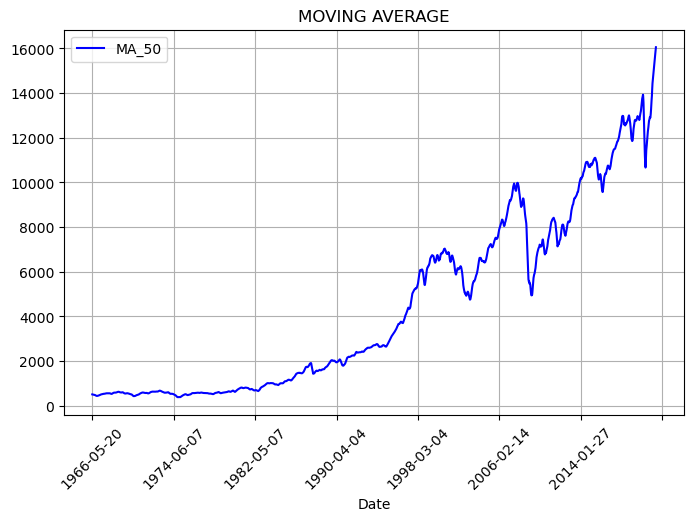

In [105]:
data_nya['MA_50'].plot(label='MA_50',figsize=(8, 5),title='MOVING AVERAGE', color='blue', grid=True)
plt.xticks(rotation=45)
plt.legend()

In [54]:
X_nya1 = data_nya[features_to_fit]
y_nya1 = data_nya['NextClose']

In [55]:
X_train_nya1, X_test_nya1, y_train_nya1, y_test_nya1 = make_train_test_split(X_nya1, y_nya1, 0.2)
print(X_train_nya1.shape)
print(y_train_nya1.shape)
print(X_test_nya1.shape)
print(y_test_nya1.shape)

(11078, 6)
(11078,)
(2769, 6)
(2769,)


In [56]:
#PART OF DATA SET INPUT CALCULATION OF NASDAQ
df_nya['MA_50'] = ta.MA(df_nya['Close'].values, timeperiod=50, matype=0)
df_nya['RSI'] = ta.RSI(df_nya['Close'].values, 14)
df_nya['SMA_Fast'] = ta.SMA(df_nya['Close'].values, 5)
df_nya['SMA_Slow'] = ta.SMA(df_nya['Close'].values, 20)
df_nya['BOL_Upp'], df_nya['BOL_Mid'], df_nya['BOL_Low'] = ta.BBANDS(df_nya['Close'].values,timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df_nya['NextClose'] = df_nya['Close'].shift(-1) #FOR OUTPUT VALUE
df_nya = df_nya.dropna()
df_nya.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,MA_50,RSI,SMA_Fast,SMA_Slow,BOL_Upp,BOL_Mid,BOL_Low,NextClose
Date,,,,,,,,,,,,,,,,
1985-03-13,NYA,1091.630005,1091.630005,1091.630005,1091.630005,1091.630005,0.0,1091.630005,1080.778998,45.760337,1097.023999,1107.259503,1124.199529,1107.259503,1090.319478,1090.260010
1985-03-14,NYA,1090.260010,1090.260010,1090.260010,1090.260010,1090.260010,0.0,1090.260010,1082.403198,44.855273,1094.993994,1105.689502,1122.819194,1105.689502,1088.559810,1083.380005
1985-03-15,NYA,1083.380005,1083.380005,1083.380005,1083.380005,1083.380005,0.0,1083.380005,1083.970198,40.520925,1092.117993,1103.976501,1122.755975,1103.976501,1085.197028,1083.910034
1985-03-18,NYA,1083.910034,1083.910034,1083.910034,1083.910034,1083.910034,0.0,1083.910034,1085.642998,40.993970,1089.834009,1102.517004,1122.716836,1102.517004,1082.317173,1098.719971
1985-03-19,NYA,1098.719971,1098.719971,1098.719971,1098.719971,1098.719971,0.0,1098.719971,1087.550597,52.388325,1089.580005,1101.877502,1121.704403,1101.877502,1082.050602,1096.390015


In [57]:
X_nya2 = df_nya[features_to_fit]
y_nya2 = df_nya['NextClose']

In [58]:
X_train_nya2, X_test_nya2, y_train_nya2, y_test_nya2 = make_train_test_split(X_nya2, y_nya2, 0.2)
print(X_train_nya2.shape)
print(y_train_nya2.shape)
print(X_test_nya2.shape)
print(y_test_nya2.shape)

(7301, 6)
(7301,)
(1825, 6)
(1825,)


# LINEAR REGRESSION

In [59]:
#WHOLE DATA SET PREDICTION OF NASDAQ
model_nas1 = LinearRegression()
model_nas1.fit(X_train_nas1, y_train_nas1)
y_pred_nas1 = model_nas1.predict(X_test_nas1)
pred_df_nas1 = pd.DataFrame({'Actual': y_test_nas1, 'Predicted': y_pred_nas1})
print(pred_df_nas1.head())
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_nas1, y_pred_nas1)))

                Actual   Predicted
Date                              
1971-06-28  107.220001   83.039631
1971-06-29  107.800003   91.200270
1971-06-30  108.470001   96.767442
1971-07-01  108.769997  102.592257
1971-07-02  109.230003  105.340155
Accuracy score of the predictions: 0.7002890615436528


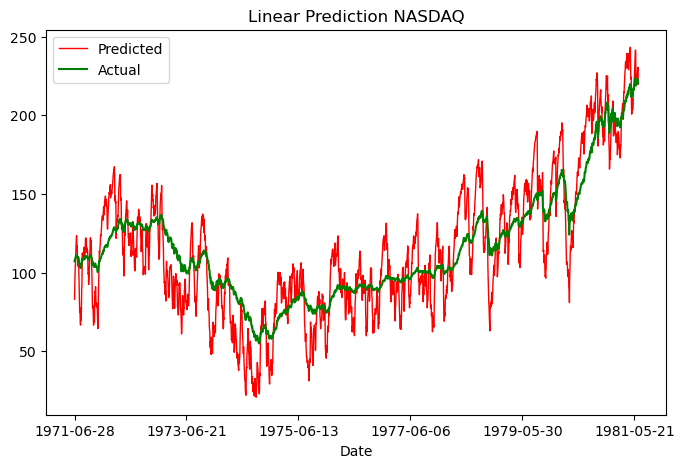

In [60]:
pred_df_nas1['Predicted'].plot(label='Predicted',figsize=(8, 5),title='Linear Prediction NASDAQ', color='red', linewidth=1.0, grid=True)
pred_df_nas1['Actual'].plot(label='Actual', color='green')
plt.legend()

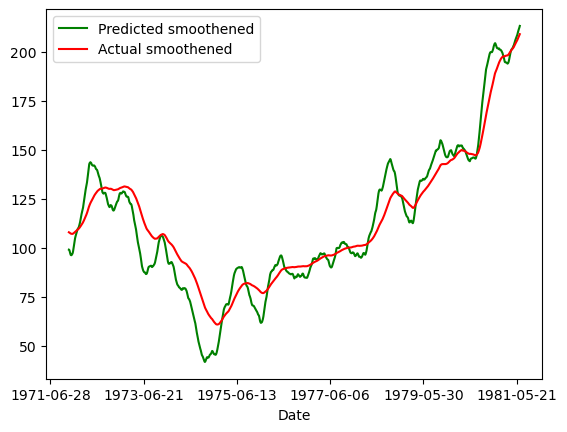

In [102]:
predicted_col = pred_df_nas1['Predicted']
mvag = predicted_col.rolling(window=100).mean()
mvag.plot(label='Predicted smoothened', color='green')
actual_col = pred_df_nas1['Actual']
mvag1 = actual_col.rolling(window=100).mean()
mvag1.plot(label='Actual smoothened', color='red')
plt.legend()

In [61]:
#PART OF DATA SET PREDICTION OF NASDAQ
model_nas2 = LinearRegression()
model_nas2.fit(X_train_nas2, y_train_nas2)
y_pred_nas2 = model_nas2.predict(X_test_nas2)
pred_df_nas2 = pd.DataFrame({'Actual': y_test_nas2, 'Predicted': y_pred_nas2})
print(pred_df_nas2.head())
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_nas2, y_pred_nas2)))

                Actual   Predicted
Date                              
1985-03-13  277.500000  246.867760
1985-03-14  278.000000  241.963903
1985-03-15  277.100006  245.392903
1985-03-18  278.899994  239.400166
1985-03-19  278.799988  253.927283
Accuracy score of the predictions: 0.8042540127779043


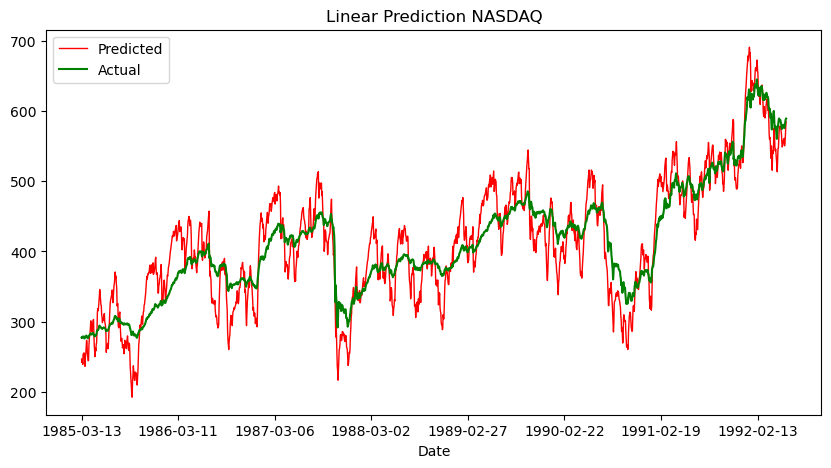

In [72]:
pred_df_nas2['Predicted'].plot(label='Predicted',figsize=(10, 5),title='Linear Prediction NASDAQ', color='red', linewidth=1.0, grid=True)
pred_df_nas2['Actual'].plot(label='Actual', color='green')
plt.legend()

In [63]:
# WHOLE DATA OF NYA DATA
model_nya1 = LinearRegression()
model_nya1.fit(X_train_nya1, y_train_nya1)
y_pred_nya1 = model_nya1.predict(X_test_nya1)
pred_df_nya1 = pd.DataFrame({'Actual': y_test_nya1, 'Predicted': y_pred_nya1})
print(pred_df_nya1.head())
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_nya1, y_pred_nya1)))

                Actual   Predicted
Date                              
1966-05-20  491.470001  429.385586
1966-05-23  494.850006  447.403006
1966-05-24  496.750000  462.638272
1966-05-25  496.750000  471.296446
1966-05-26  498.450012  474.045495
Accuracy score of the predictions: 0.6352607513097469


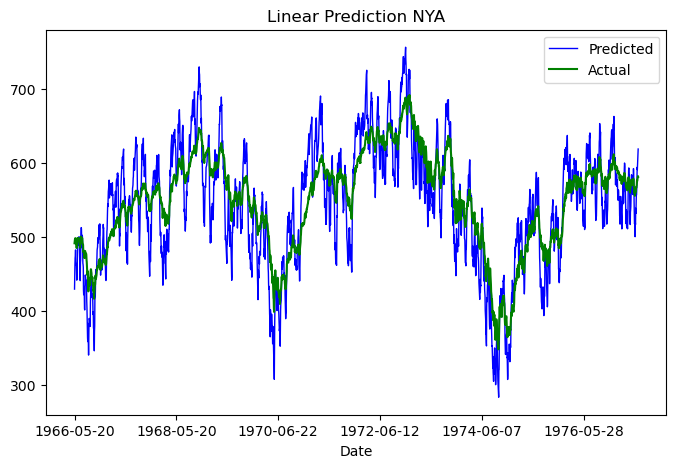

In [64]:
pred_df_nya1['Predicted'].plot(label='Predicted',figsize=(8, 5),title='Linear Prediction NYA', color='blue', linewidth=1.0, grid=True)
pred_df_nya1['Actual'].plot(label='Actual', color='green')
plt.legend()

In [65]:
#PART OF DATA OF NYA DATA
model_nya2 = LinearRegression()
model_nya2.fit(X_train_nya2, y_train_nya2)
y_pred_nya2 = model_nya2.predict(X_test_nya2)
pred_df_nya2 = pd.DataFrame({'Actual': y_test_nya2, 'Predicted': y_pred_nya2})
print(pred_df_nya2.head())
print("Accuracy score of the predictions: {0}".format(r2_score(y_test_nya2, y_pred_nya2)))

                 Actual    Predicted
Date                                
1985-03-13  1090.260010  1053.131796
1985-03-14  1083.380005  1046.762334
1985-03-15  1083.910034  1021.344612
1985-03-18  1098.719971  1021.936907
1985-03-19  1096.390015  1082.337031
Accuracy score of the predictions: 0.9750768897700876


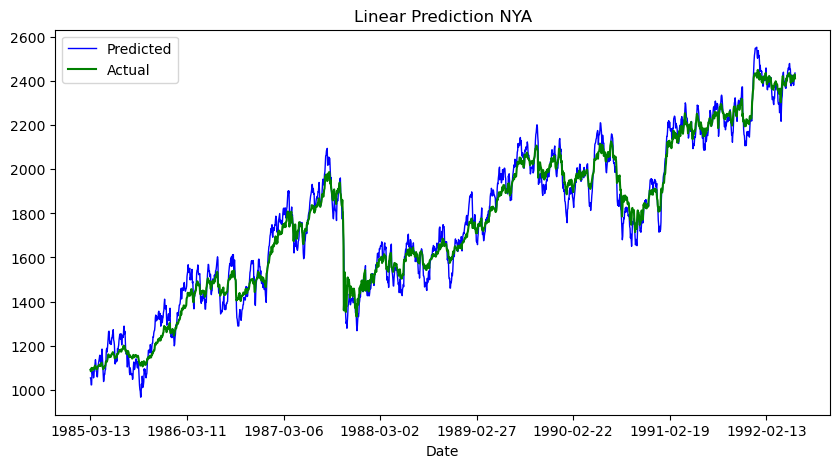

In [77]:
pred_df_nya2['Predicted'].plot(label='Predicted',figsize=(10, 5),title='Linear Prediction NYA', color='blue', linewidth=1.0, grid=True)
pred_df_nya2['Actual'].plot(label='Actual', color='green')
plt.legend()

# LASSO REGRESSION

In [80]:
#WHOLE DATA SET OF NASDAQ DATA
lasso_model_nas1 = Lasso()
lasso_model_nas1.fit(X_train_nas1, y_train_nas1)
lasso_model_score_nas1 = lasso_model_nas1.score(X_test_nas1, y_test_nas1)
print('Lasso Model score:', lasso_model_score_nas1)
lasso_model_nas1.path

Lasso Model score: 0.389899574173993


C:\Users\simra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+07, tolerance: 6.713e+06
  model = cd_fast.enet_coordinate_descent(


<function sklearn.linear_model._coordinate_descent.enet_path(X, y, *, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True, **params)>

In [81]:
#PART OF DATA SET OF NASDAQ DATA
lasso_model_nas2 = Lasso()
lasso_model_nas2.fit(X_train_nas2, y_train_nas2)
lasso_model_score_nas2 = lasso_model_nas2.score(X_test_nas2, y_test_nas2)
print('Lasso Model score:', lasso_model_score_nas2)
lasso_model_nas2.path

Lasso Model score: 0.7266814066420717


C:\Users\simra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.352e+07, tolerance: 4.996e+06
  model = cd_fast.enet_coordinate_descent(


<function sklearn.linear_model._coordinate_descent.enet_path(X, y, *, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True, **params)>

In [84]:
#WHOLE DATA SET OF NYA DATA
lasso_model_nya1 = Lasso()
lasso_model_nya1.fit(X_train_nya1, y_train_nya1)
lasso_model_score_nya1 = lasso_model_nya1.score(X_test_nya1, y_test_nya1)
print('Lasso Model score:', lasso_model_score_nya1)
lasso_model_nya1.path

Lasso Model score: 0.06046862264293218


C:\Users\simra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.247e+07, tolerance: 1.764e+07
  model = cd_fast.enet_coordinate_descent(


<function sklearn.linear_model._coordinate_descent.enet_path(X, y, *, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True, **params)>

In [85]:
#PART OF DATA SET OF NYA DATA
lasso_model_nya2 = Lasso()
lasso_model_nya2.fit(X_train_nya2, y_train_nya2)
lasso_model_score_nya2 = lasso_model_nya2.score(X_test_nya2, y_test_nya2)
print('Lasso Model score:', lasso_model_score_nya2)
lasso_model_nya2.path

Lasso Model score: 0.9740837531849338


C:\Users\simra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+07, tolerance: 7.322e+06
  model = cd_fast.enet_coordinate_descent(


<function sklearn.linear_model._coordinate_descent.enet_path(X, y, *, l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, check_input=True, **params)>